# 集団の比較

サンプルデータはすでに使ったことのあるファイルSCMEM20211018.csvです．
このデータはスポーツナビ
（https://sports.yahoo.co.jp/japan/）
にあった，2021年10月18日現在のサッカー日本代表選手の身長，体重，年齢データをCSVファイルとして用意したものです．







In [1]:
# CSVファイルの読み込み
# 変数名Japanに保存
Japan <- read.csv("SCMEM20211018.csv", stringsAsFactors=TRUE)
# はじめの6行を表示，
head(Japan)
# データの構成を表示
# PropertyはMEN, OLYM, WOMの3種で構成されている
# それぞれ男子，五輪，女子メンバーに対応する
summary(Japan)
# 変数名MenにPropertyの値がMENであるデータを代入
Men <- Japan[Japan$Property=="MEN",]
# 変数名WomenにPropertyの値がWOMであるデータを代入
Women <- Japan[Japan$Property=="WOM",]
# 変数名OlymにPropertyの値がOLYMであるデータを代入
Olym <- Japan[Japan$Property=="OLYM",]

,Property,Height,Weight,Age
,<fct>,<int>,<int>,<int>
1,MEN,185,82,38
2,MEN,187,84,32
3,MEN,190,84,20
4,MEN,182,73,22
5,MEN,186,77,26
6,MEN,176,69,27


 Property      Height          Weight           Age       
 MEN :25   Min.   :154.0   Min.   :44.00   Min.   :19.00  
 OLYM:22   1st Qu.:167.0   1st Qu.:60.50   1st Qu.:23.00  
 WOM :23   Median :175.5   Median :69.00   Median :24.00  
           Mean   :174.5   Mean   :68.13   Mean   :25.33  
           3rd Qu.:182.0   3rd Qu.:76.00   3rd Qu.:27.00  
           Max.   :190.0   Max.   :91.00   Max.   :38.00  

集団同士を比較するにはどうしたらいいでしょうか．
たとえば2022年のサッカーで，アルゼンチン代表とフランス代表を比較するのに，アルゼンチンのメッシ選手とフランスのエムバペ選手とを比較することはできます．
しかし，それはチーム同士の比較として一面的に過ぎるし，一人同士の比較としても，それぞれ優れた点がさまざまにあるので，単純な比較もできないでしょう．

サッカー選手個人やサッカーチームのように，複雑な対象ではなく，数値情報同士だけであれば，比較は相当に簡単なことになります．
2つの数値の大小は簡単に比較できるからです．
それでも集団同士の比較となると，上に述べた比較のように，誰を選ぶとよいのかが疑問として残ります．

集団同士の比較には平均値がよく使われます．
しかし，なぜ平均値で比較することが良いのかはあまり説明されることはありません．
まずは，各チームから何人かの代表を選び（サンプリングするという）比較をしてみましょう．

次の例では，Rの関数sampleにより，男子代表Menの身長Height，五輪代表Olymの身長Height，女子代表Womenの身長Heightの間で比較をしています．
この関数はとくに指定しない限り，重複を許したランダムなサンプリングを行います．
このため20人余りのサッカーチームから50人のデータを選ぶことも可能です．



## 平均値による比較

以下では平均値による比較方法について検討します．
まずは2つの集団から1名ずつ選びながら，その身長の差を，ヒストグラムをとることにより特徴を観察してみます．
n名を選んだときは，そのn名の身長の平均値をRの平均値関数meanを利用して求めた上で差を計算しています．

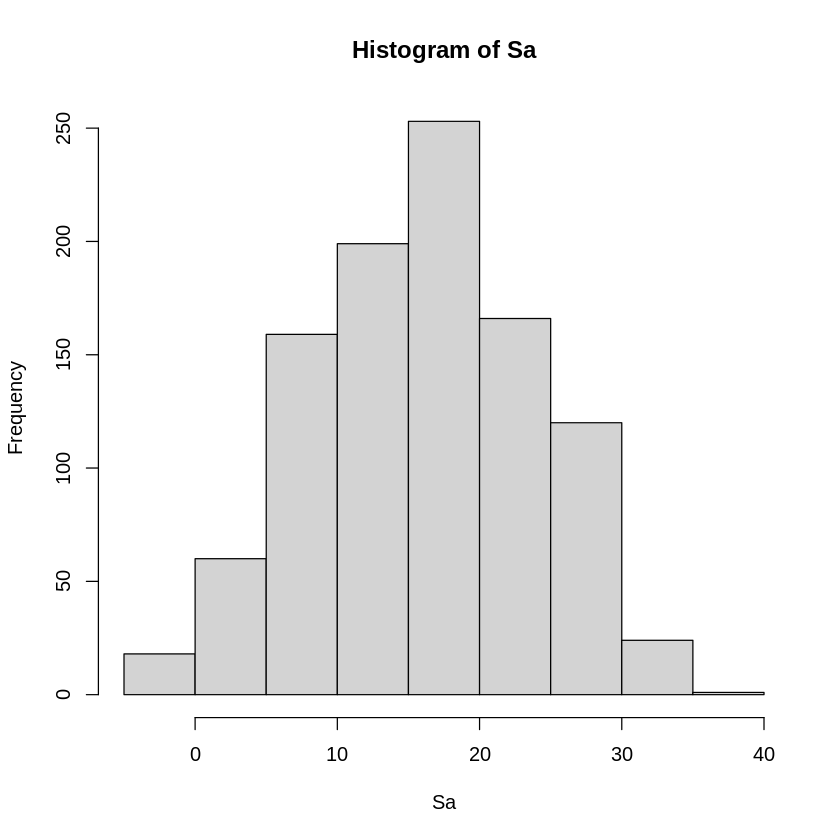

In [2]:
# 集計するデータをm個集める
m <- 1000
# サンプルをn個取り出す
# もととなるデータは20個余りしかないが，それより多ければ重複して取り出す
n <- 1
# 変数Saにm回分のサンプルを蓄える
Sa = numeric(m)
for (i in 1:m) {
# 男子代表と女子代表の身長の比較
  x <- sample(Men$Height,n)
  y <- sample(Women$Height,n)
# 身長xと身長yの差をとる，正なら男子代表，負なら五輪代表が高く，0なら等しい
  Sa[i] <- mean(x)-mean(y)
}
hist(Sa)


問：上のRプログラムでmは変えずにnを変えて実行した場合に得られるグラフの特徴を観察してみよう．

問：上のRプログラムでnは変えずにmを変えて実行した場合に得られるグラフの特徴を観察してみよう．

問：上のRプログラムで取り出すデータの一方を女子代表に変えて実行した場合に得られるグラフの特徴を観察してみよう．

問：ヒストグラムの概形のもつ特徴をことばで表してみよう．

ここに用意した変更前のプログラムでは男子代表と女子代表の比較でn=1000，m=1としました．
このとき上端から2.5％（つまり25個分）の値は30から35の間，下端は0から5の間にあります．
これは比較している2つの集団の差の約95％が，およそ5からおよそ30までの間にあることを示しています．

上の問のうち概形に関する答え：中央で上に凸，およそ左右対称，両裾に向かって下に凸になり，両裾の度数は小さいとはいえ，すぐに0にはなりません．
これはベル型曲線と呼ばれる曲線のもつ特徴であり，後で説明します．

問：上の問にしたがってサンプリングする人数nを5人や10人としたときに，この約95％を表す数値の幅はどのように変化するか確かめよう．

ここでRの用意するt検定関数t.testを実行してみます
．


In [3]:
# stemは幹葉図を与える関数
t.test(Men$Height,Women$Height)


	Welch Two Sample t-test

data:  Men$Height and Women$Height
t = 10.053, df = 44.47, p-value = 5.029e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 12.89083 19.35265
sample estimates:
mean of x mean of y 
 179.6000  163.4783 


ほとんどの検定手法では偶然に検定統計量（ここでは平均の差）の値が得られる確率（p値）を計算します．
5.029e-13は$5.029\times 10^{-13}$を1行に表す記法です．
（多くの場合に）偶然ではない状況に設定される仮説のことを対立仮説（alternative hypothesis）といいます．

以上，メッセージにある文の説明をしましたが，本講座では具体的な計算方法までは解説しません．
後でp値と対立仮説については説明します．

メッセージの中でも，ここでは95％信頼区間（95percent confidence interval）に注目します．
これは上のヒストグラムで得た観察と同じような意味の数値です．
すでに問で試したと思いますが，例題の数値（n=1）を10や20など大きな数値にして実行してみてください．
この場合に上下端から2.5％にあるおよその値を読み取ってみてください．
どうですか．
Rのt検定関数の出した95％信頼区間の値に近くなったと思います．

この信頼区間のことを理解するために，集団の比較方法の探求をひとまず休んで，ベル型曲線を扱うことに集中します．

## 平均値の点推定と信頼区間

次のプログラムは先ほどのプログラムを少しだけ変更しました．
2つの集団の平均値の差を計算していたことに対して，1つの集団から取り出したサンプル（標本という）の平均値を単に扱います．



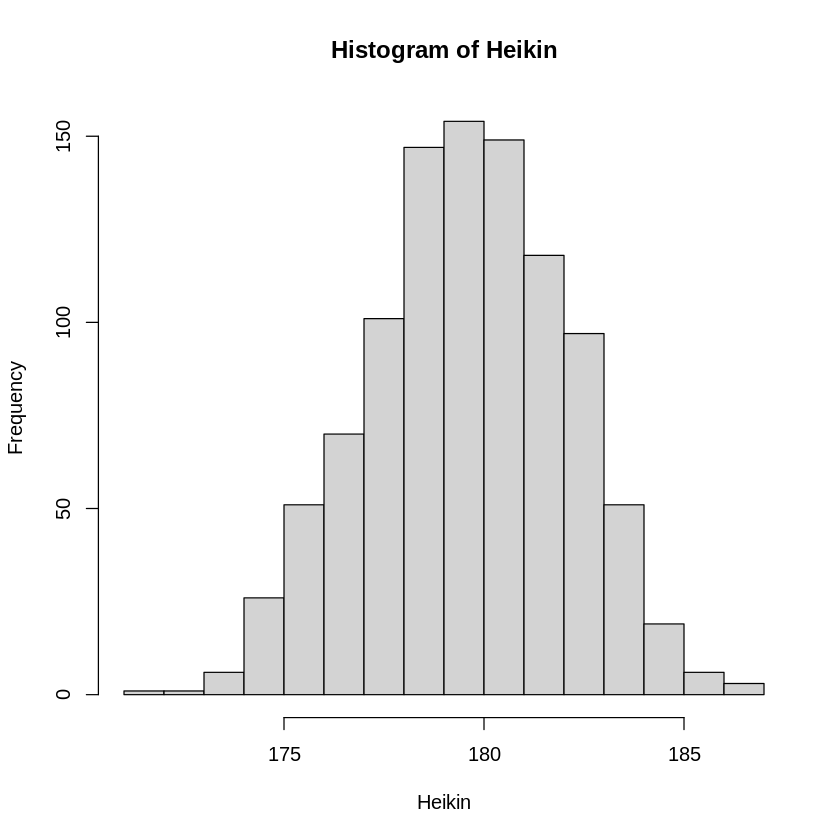

In [6]:
# 集計するデータをm個集める
m <- 1000
# サンプルをn個取り出す
# もととなるデータは20個余りしかないが，それより多ければ重複して取り出す
n <- 5
# 変数Saにm回分のサンプルを蓄える
Heikin = numeric(m)
for (i in 1:m) {
# 男子代表の身長の平均
  x <- sample(Men$Height,n)
#  y <- sample(Women$Height,n)
# 身長xと身長yの差をとる，正なら男子代表，負なら五輪代表が高く，0なら等しい
  Heikin[i] <- mean(x)
}
hist(Heikin)

サンプリングの人数nを5で用意しました．

問：nを増やすとグラフの特徴はどのように変化するか．

この例題では，もとの集団が20人余りしかいないので，nをこの集団の人数以上に増やしたとき，特徴は失われてしまいます．
この男子代表の特徴（の一部）を備えた10000人の集団をプログラムで作成し，それをもとにサンプリング人数を100程度まで変化させて観察しましょう．

ここでいう特徴の一部とは，平均および標準偏差です．
これらの値を計算させます．

In [7]:
MH <- mean(Men$Height)
MH
MS <- sd(Men$Height)
MS

[1] 179.6

[1] 6.284903

これらの値を特徴にもつ正規分布にしたがう乱数を関数rnormにより10000個生成して，男子代表の身長データに代えて，上と同じようにしてヒストグラムを作ります．

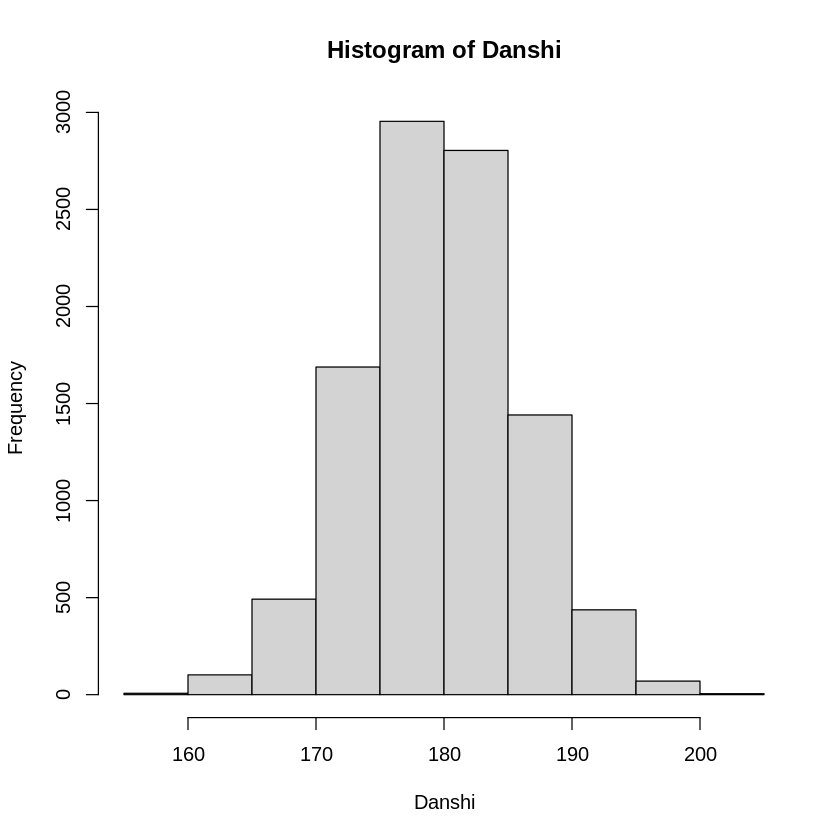

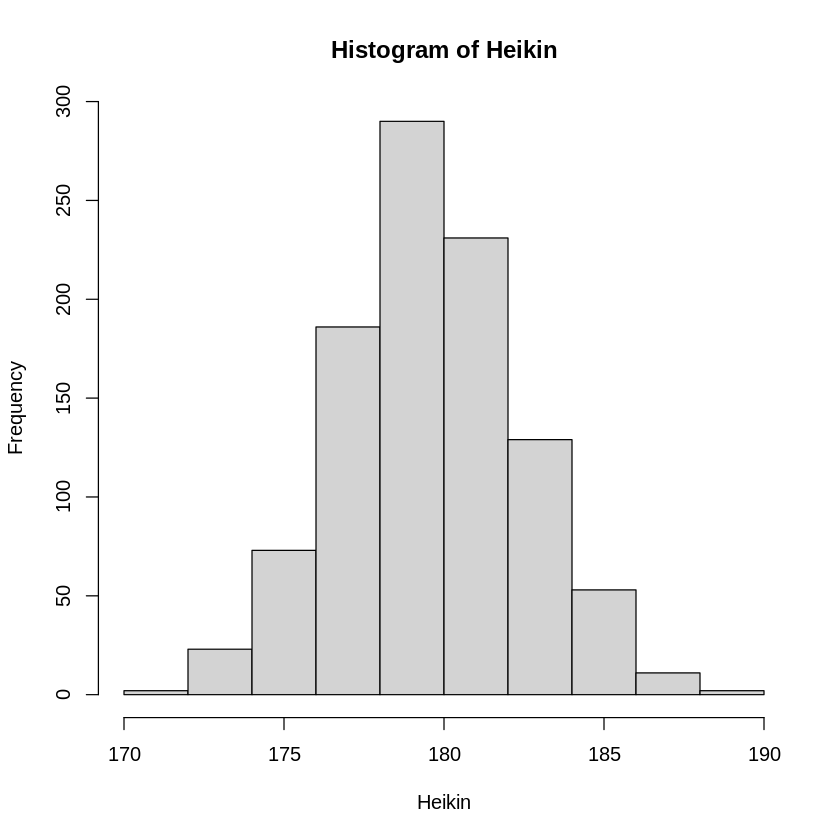

In [9]:
# 平均MH, 標準偏差MSに応じた正規分布にしたがう乱数を与え，ヒストグラムも確認する
Danshi <- rnorm(10000,MH,MS)
hist(Danshi)
# 集計するデータをm個集める
m <- 1000
# サンプルをn個取り出す
# もととなるデータは20個余りしかないが，それより多ければ重複して取り出す
n <- 5
# 変数Saにm回分のサンプルを蓄える
Heikin = numeric(m)
for (i in 1:m) {
# 男子代表の身長の平均
#  x <- sample(Men$Height,n)
  x <- sample(Danshi,n)
# 身長xと身長yの差をとる，正なら男子代表，負なら五輪代表が高く，0なら等しい
  Heikin[i] <- mean(x)
}
hist(Heikin)

用意したデータもベル型曲線の特徴が見られますが，平均値の集計にもベル型曲線の特徴が見られると思います．
平均値のヒストグラムにおいて，上下端から2.5％の値は上端側が185ぐらい，下端側が173ぐらいです．
両者の概形は似ていても，横軸の値に違いがあるのを見逃さないようにしてください．

問：nとして10，20，50，100にしたときの，上下端から2.5％に相当する横軸の値を読み取ってみよう．

ところで上の実験結果ですが，元データがベル型曲線だったから，平均値の分布もベル型曲線になったのでしょうか．
次の実験では10000個のデータを一様分布（どの値も同様に確からしい分布，サイコロの目の出る回数などでお馴染み）にしてみます．


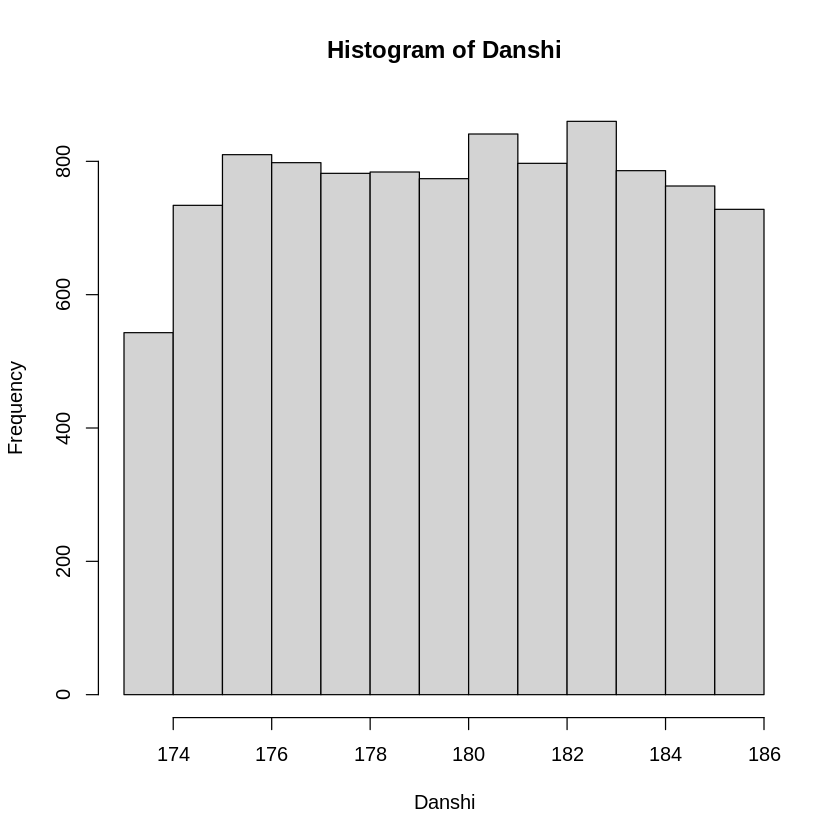

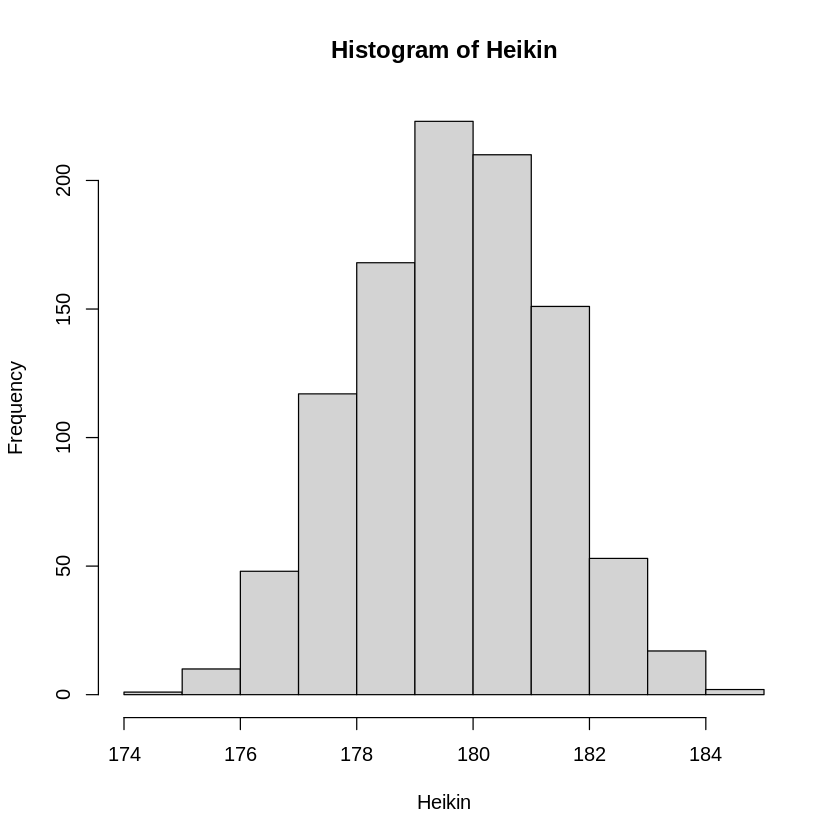

In [10]:
# 平均MH, 標準偏差MSに応じた一様分布にしたがう乱数を与え，ヒストグラムも確認する
Danshi <- runif(10000,MH-MS,MH+MS)
hist(Danshi)
# 集計するデータをm個集める
m <- 1000
# サンプルをn個取り出す
# もととなるデータは20個余りしかないが，それより多ければ重複して取り出す
n <- 5
# 変数Saにm回分のサンプルを蓄える
Heikin = numeric(m)
for (i in 1:m) {
# 男子代表の身長の平均
#  x <- sample(Men$Height,n)
  x <- sample(Danshi,n)
# 身長xと身長yの差をとる，正なら男子代表，負なら五輪代表が高く，0なら等しい
  Heikin[i] <- mean(x)
}
hist(Heikin)

一目瞭然ですね．
もとにしたデータの分布では，どの棒もおおむね高さが同じになるヒストグラムですが，平均値の分布はやはりベル型曲線になりました．
このベル型曲線を与える分布のことを正規分布といいます．
グラフの概形としては同じでも，横軸を見ると値の広がり方や中央と見られるところの値も違います．
そのことを「平均$\mu$，標準偏差$\sigma$の正規分布」といい，記号$N(\mu,\sigma)$で表します．
そして上で実験してきた平均値に関して次の数学的性質が成り立ちます．

### 中心極限定理

平均$\mu$，標準偏差$\sigma$の母集団から得られるサイズ（標本の大きさともいう）$n$の標本の平均値$m$は正規分布
$$
N\left(\mu,\frac{\sigma^2}{n}\right)
$$
にしたがう．

というものです．
この定理の文章には，母集団の分布の特徴として「正規分布」などの形に関する説明が含まれていないことに注意してください．
この「なんとか分布にしたがう」というのを記号$\sim$を使って
$$
m\sim N\left(\mu,\frac{\sigma^2}{n}\right)
$$
と表します．$m$は標本平均でしたね．

正規分布と名前がつくだけあって，変数の値（横軸の値）がある範囲にあるときの確率がわかっています．

一つあげると
$$
x\sim N\left(\mu,\sigma^2\right)
$$
に対して
$$
\mu-1.96\sigma < x < \mu+1.96\sigma
$$
をxが満たす確率は95%になります．
これが上のレポートではt検定でしたが，95%信頼区間の（正規分布に対する）正体です．

平均値の差の場合に，上の中心極限定理を書き直すと次の通りとなります．
2つの母集団が出てくるために，少し複雑な表現になっています．

平均$\mu_1$，標準偏差$\sigma$の母集団から得られるサイズ$n_1$の標本平均が$m_1$であり，平均$\mu_2$，標準偏差$\sigma$の母集団から得られるサイズ$n_2$の標本平均が$m_2$であるとき
$$
m_1-m_2 \sim N\left(\mu_1-\mu_2,\sigma^2\left(\frac{1}{n_1}+\frac{1}{n_2}\right)\right)
$$
にしたがう．

ここまでの実験でも見られたように，標本の大きさnが小さいとベル型曲線の特徴は少し崩れているようです．
実際の応用においては，この崩れを補うためにt分布という数学ツールが開発されました．
この分布を用いるのがt検定です．

### 平均値の有用性

平均値がたいへん有用な理由は，ここまでで説明してきた中心極限定理にあります．
分析したいもとのデータの特徴があまりわからなくても，平均値であれば数学的性質はどれも共通しているからです．

だからといって，正規分布でないことが明らかなものに，この性質を適用してはいけません．
次回はそうした正規分布の特徴をもたないデータの観察もします．

### 正規分布的な現象が生じる理由

私たちの身の回りにあるデータには誤差があり，得られたデータにはばらつきがあります．
そうしたばらつきがどのように生じるか，たとえば身長や体重のデータは多数集めて集計してみると正規分布に似た特徴が見られます．
[例：データ製作所のページ](https://data-seisaku.com/00400-mext-00400002-hyo02-03-full-list/)